In [1]:
import matplotlib.pyplot as plt  
import numpy                       #here we load numpy
import time, sys                   #and load some utilities
%matplotlib inline 
from joPlot import JoPlot 
import sympy
from sympy import init_printing
init_printing(use_latex=True)

In [2]:
# Next time: Burgers ===== done
# Overleaf - make and account with UW ===== done
# GitHub account ===== 
# Plots as pretty pictures

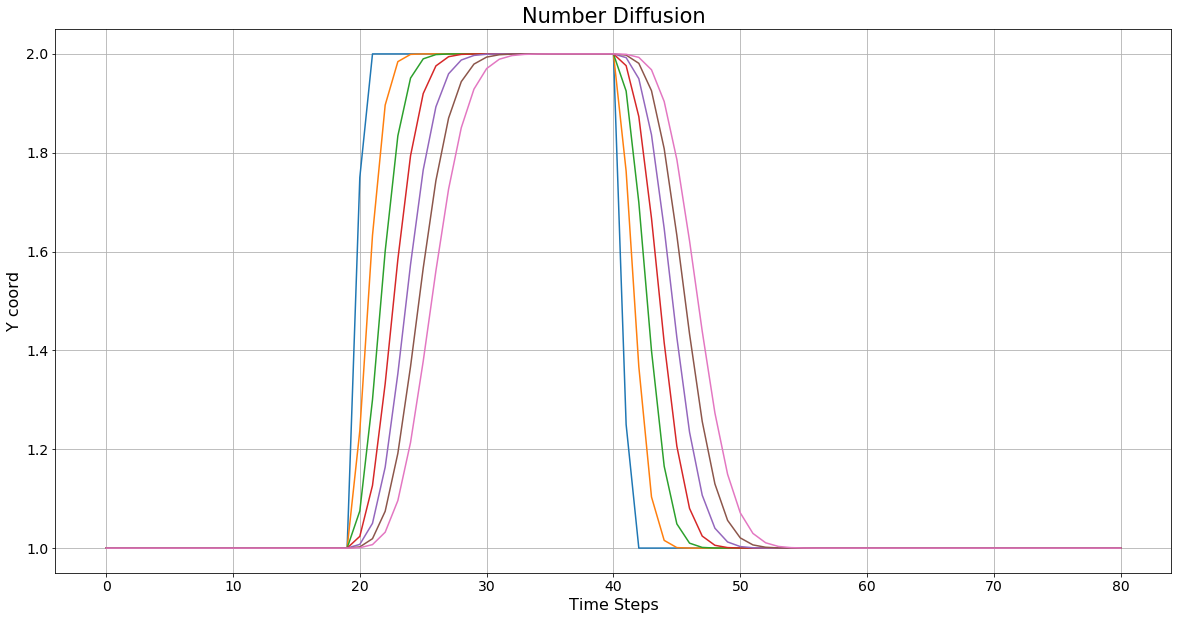

In [3]:
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(111, xlabel='Time Steps', 
                  ylabel='Y coord', 
                #ylim=(0, process["T_infinity"])
                  )

#Ratio of c*(dx/dt) < .5 or else it blows up
height = 2
c = .5
nx = 81  # try changing this number from 41 to 81 and Run All ... what happens?
dx = height / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
dt = .0125  #dt is the amount of time each timestep covers (delta t)
      #assume wavespeed of c = 1 

u = numpy.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = height  #setting u = 2 between 0.5 and 1 as per our I.C.s
#print(u)

un = numpy.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    if n%4 == 0:
        JoPlot(ax1, u, "Number Diffusion", {});

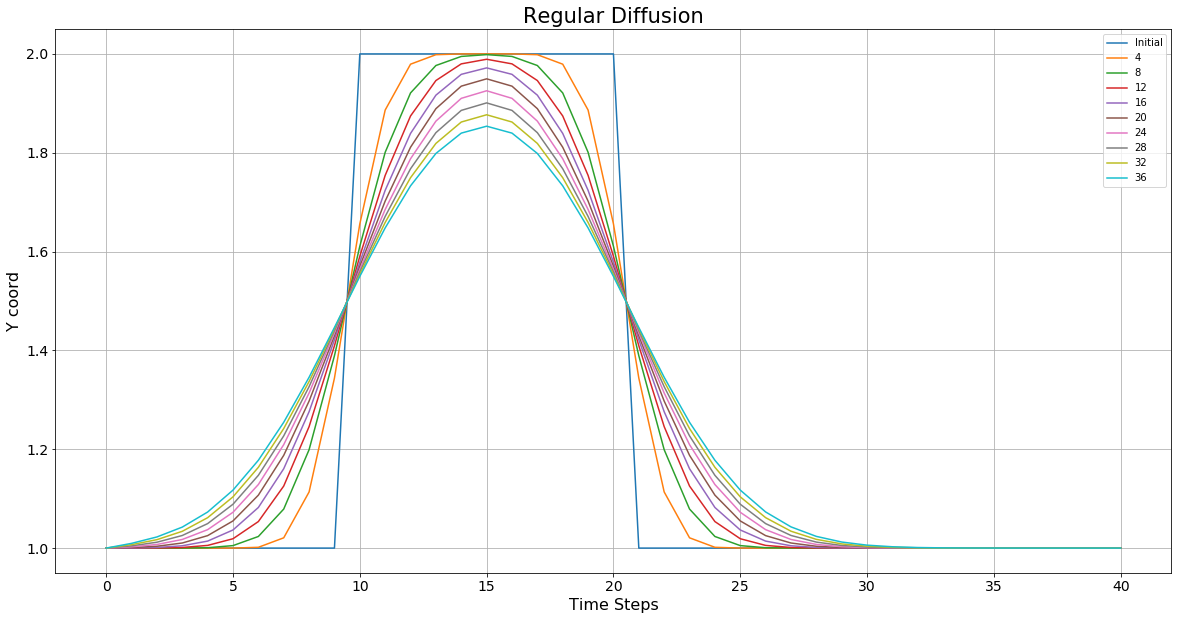

In [4]:
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(111, xlabel='Time Steps', 
                  ylabel='Y coord', 
                #ylim=(0, process["T_infinity"])
                  )

height = 2
c = .5
nx = 41
dx = 2 / (nx - 1)
nt = 40    #the number of timesteps we want to calculate if you increase nu it should diffuse faster
nu = 0.3   #the value of viscosity
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / nu #dt is defined using sigma ... more later! this is keeping the ratios the same so nothing really changes


u = numpy.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

#plt.plot(numpy.linspace(0,2,nx), u, label = "Initial")
JoPlot(ax1, u, "",{'label':'Initial'})
un = numpy.ones(nx) #our placeholder array, un, to advance the solution in time

for n in range(1, nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    #for i in range(1, nx): ## you can try commenting this line and...
    for i in range(1, nx - 1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    if n%4 == 0:
        JoPlot(ax1, u, "Regular Diffusion", {'label':n});
        plt.plot(label = n)
#plt.plot(numpy.linspace(0, 2, nx), u);  
plt.legend()
plt.savefig(fname="Diffusion.PNG")
plt.show()

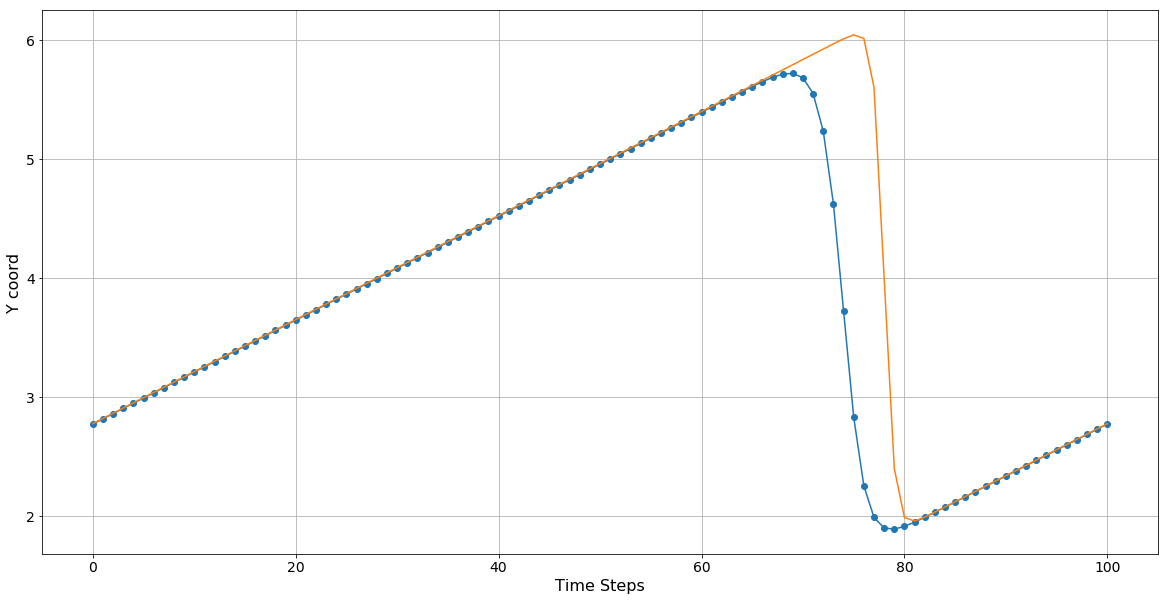

In [5]:
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(111, xlabel='Time Steps', 
                  ylabel='Y coord')

### Setting up the differential equation
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

phiprime = phi.diff(x)
phiprime

from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
#print(u)

ufunc = lambdify((t, x, nu), u)
#print(ufunc(1, 4, 3))

###variable declarations
nx = 101
nt = 100
dx = 2 * numpy.pi / (nx - 1)
nu = .07
dt = dx * nu

x = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0

u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
#u

#JoPlot(ax1, 10, u, "Burgers Equation")

for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytical = numpy.asarray([ufunc(nt * dt, xi, nu) for xi in x])

JoPlot(ax1, u, 'Burgers Equation', {'marker':'o', 'label':'Computational'})
JoPlot(ax1, u_analytical, '', {'label':'Analytical'})